<a href="https://colab.research.google.com/github/seoyerin1130/TIL/blob/main/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

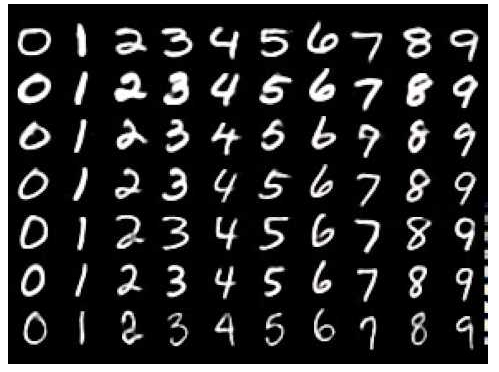

In [ ]:
# Pytorch 프레임워크 import
# matplotlib을 이용해 데이터 시각화
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # GPU가 있다면 GPU, 없다면 CPU
print("다음 기기로 학습 :", device)

다음 기기로 학습 : cuda


In [ ]:
random.seed(777)
torch.manual_seed(777) # 시드값 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
# 하이퍼 파라미터
epochs = 25 # 학습 횟수
batch_size = 100 # 배치 사이즈

In [ ]:
# 데이터셋을 다운로드하고 학습 데이터셋과 테스트 데이터셋으로 나눔
mnist_train = dsets.MNIST(root='MNIST_data/', 
                        train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', 
                         train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 390297975.50it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 46554840.06it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 107379613.65it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 22229321.78it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
# 다운로드한 데이터셋을 읽어들임
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

In [ ]:
linear = nn.Linear(784, 10, bias=True).to(device) # .to()는 ~를 사용하겠다.
# 즉 GPU를 사용하겠다.

In [ ]:
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
for epoch in range(epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577715
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933438
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422765
Epoch: 0016 cost = 0.272883654
Epoch: 0017 cost = 0.271629602
Epoch: 0018 cost = 0.270609826
Epoch: 0019 cost = 0.269295007
Epoch: 0020 cost = 0.268277347
Epoch: 0021 cost = 0.267255455
Epoch: 0022 cost = 0.266613454
Epoch: 0023 cost = 0.265661418
Epoch: 0024 cost = 0.264922321
Epoch: 0025 cost = 0.263888687
Learning finished


Accuracy : 0.8784 %
Label :  7
Prediction :  7


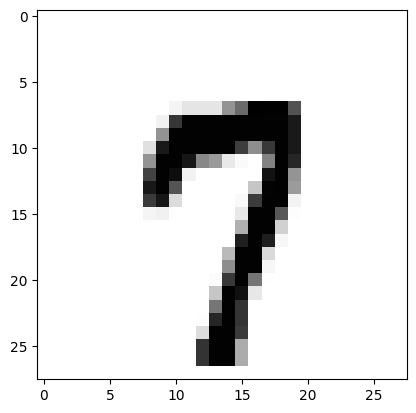

In [ ]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print(f'Accuracy : {round(accuracy.item(), 5)} %')


    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)


    print('Label : ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction : ', torch.argmax(single_prediction, 1).item())


    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()